In [6]:
import numpy as np
import matplotlib.pyplot as plt
import math as mat
import matplotlib
from matplotlib import gridspec
from scipy.optimize import curve_fit
import pylab as pylt
from scipy.constants import c,h, k
from numpy.random import rand


#### Parámetros gráficos

In [7]:
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS"
matplotlib.rcParams['font.family'] = "Serif"

# Get current size
fig_size = plt.rcParams["figure.figsize"]
  
#Set the font size    
matplotlib.rcParams['font.size'] = '13'    
    
# Set figure width to 12 and height to 9
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

#### Funciones

In [38]:
def blackbody_num(n, T):
    """ Blackbody as a function of wavelength (um) and temperature (K).

    returns units of erg/s/cm^2/cm/Steradian  
    """
    from scipy.constants import h,k,c
    bb = 2*h*n**3 / c**2 *(1/ (np.exp(h*n / (k*T)) - 1))
    return bb/np.mean(bb)
    

In [39]:
def normalizator(i):
    return i/np.mean(i)

#### Creación del dato sintético

In [14]:
frec = np.arange(1.3*1e14,1.5*1e14, 0.0005*1e14)
dato1 = blackbody_num(frec, 2100)
#plt.plot(frec*1e-11,dato1)

In [15]:
#np.seed(3)
mu, sigma = 0, np.abs(dato1[0]-dato1[-1])/2 # mean and standard deviation, hace un test del error en la T en funcion de esto
s = np.random.normal(mu, sigma, frec.size)

In [16]:
dato2 = dato1 + s
#plt.plot(frec,dato2)

In [17]:
dato3 = dato2*500000   #multiplico y sumo una constante para llevar a unidades arbitrarias
#plt.plot(frec,dato3)

In [19]:
dato4 = normalizator(dato3)
#plt.plot(frec,dato4)

#### Ajuste 

In [20]:
popt, pcov = curve_fit(blackbody_numi, frec, dato4, p0=(1300))

In [32]:
#plt.plot(frec ,blackbody_numi(frec,popt))
#plt.plot(frec,dato4)

#### Test de Temperatura recuperada en funcion de la constante de cambio de unidades

In [41]:
a = rand(1000)*50000
frec = np.arange(1.3*1e14,1.5*1e14, 0.0005*1e14)
dato1 = blackbody_num(frec, 1200)
mu, sigma = 0, np.abs(dato1[0]-dato1[-1])/10 # mean and standard deviation, hace un test del error en la T en funcion de esto
s = np.random.normal(mu, sigma, frec.size)
dato2 = dato1 + s
T = np.array([])

for i in range(a.size):
    
    dato3 = dato2*a[i]
    dato4 = normalizator(dato3)
    popt, pcov = curve_fit(blackbody_numi, frec, dato4, p0=(1300))
    
    T = np.append(T,popt)
 

# En mil realizaciones con constante random entre 1 y 50000 da siempre la misma temperatura con una precision de 
# al menos la 4ta cifra decimal

#### Test Delta T en funcion del nivel del ruido

In [26]:
a = rand(1000)*50000
frec = np.arange(1.3*1e14,1.5*1e14, 0.0005*1e14)
dato1 = blackbody_num(frec, 1200)

T = []

x = np.array([20,10,5,3,2,1]) # 5, 10, 20, 33, 50 y 100 % de error respectivamente

for j in range (x.size):
    Ti = np.array([])
    for i in range(1000):
               
        mu, sigma = 0, np.abs(dato1[0]-dato1[-1])/x[j] # mean and standard deviation, hace un test del error en la T en funcion de esto
        s = np.random.normal(mu, sigma, frec.size)
        dato2 = dato1 + s
    
        dato3 = dato2*5000   #queda fija la constante
        dato4 = normalizator(dato3)
        popt, pcov = curve_fit(blackbody_numi, frec, dato4, p0=(1300))
    
        Ti = np.append(Ti,popt)
        
    
    T.append(Ti)

In [35]:
T_dif_noises  = np.array([])
for i in range(len(T)):
    mean = np.mean(T[i])
    T_dif_noises = np.append(T_dif_noises, mean)

In [36]:
DeltaT_dif_noises  = np.array([])
for i in range(len(T)):
    delta = np.std(T[i])
    DeltaT_dif_noises = np.append(DeltaT_dif_noises, delta)

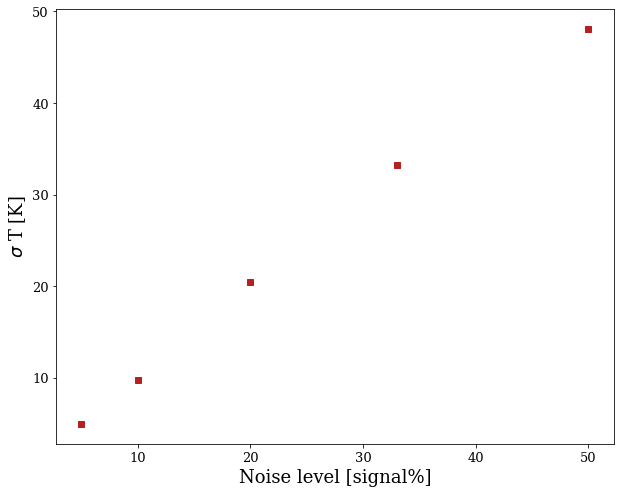

In [29]:
fig = plt.figure()
noise  = np.array([5,10,20,33,50,100])
plt.plot(noise[0:5],DeltaT_dif_noises[0:5], 'rs', color = 'firebrick')
plt.xlabel("Noise level [signal%]", fontsize = 18)
plt.ylabel("$\sigma$ T [K]", fontsize = 18)
fig.savefig("sigma_T.pdf")
fig.savefig("sigma_T.png")

#### Figura para ejemplo de test:

<Figure size 720x576 with 0 Axes>

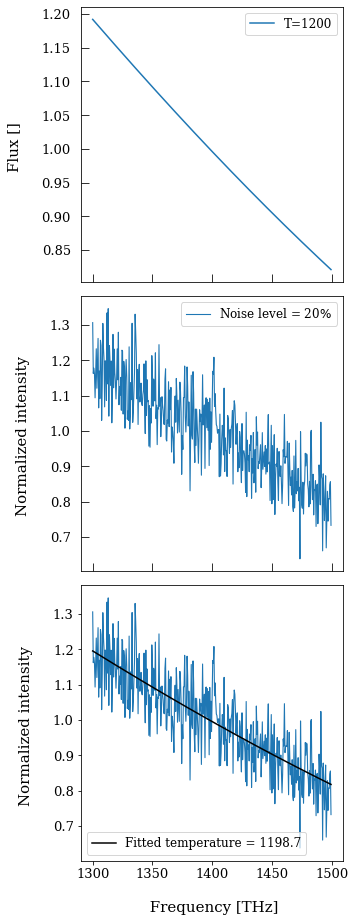

In [30]:
fig = plt.figure()
fig = plt.figure(figsize=(5,13))
gs = gridspec.GridSpec(3, 1)

ax10 = fig.add_subplot(gs[0:1,0])


frec = np.arange(1.3*1e14,1.5*1e14, 0.0005*1e14)
dato1 = blackbody_num(frec, 1200)
plt.plot(frec*1e-11,dato1, label = 'T=1200')
ax10.tick_params(labelbottom=False, axis='both', which='both', direction='in',length=8, pad=10)
ax10.set_ylabel("Flux [] \n", fontsize = 15)

plt.legend(fontsize = 12)

ax20 = fig.add_subplot(gs[1:2,0])
mu, sigma = 0, np.abs(dato1[0]-dato1[-1])/5 # mean and standard deviation, hace un test del error en la T en funcion de esto
s = np.random.normal(mu, sigma, frec.size)
dato2 = dato1 + s
dato3 = dato2*500000
dato4 = normalizator(dato3)
plt.plot(frec*1e-11,dato4, label = 'Noise level = 20$\%$', linewidth = 1.1)
ax20.tick_params(labelbottom=False, axis='both', which='both', direction='in',length=8, pad=10)
ax20.set_ylabel("Normalized intensity \n", fontsize = 15)

plt.legend(fontsize = 12)

ax30 = fig.add_subplot(gs[2:3,0])

popt, pcov = curve_fit(blackbody_numi, frec, dato4, p0=(1300))
plt.plot(frec*1e-11,dato4, linewidth = 1.1)
plt.plot(frec*1e-11 ,blackbody_numi(frec,popt), label = 'Fitted temperature = 1198.7', color = 'black')


ax30.set_xlabel("\n Frequency [THz]", fontsize = 15)
ax30.set_ylabel("Normalized intensity \n", fontsize = 15)

plt.legend(fontsize = 12)

plt.tight_layout()

fig.savefig('test.pdf')
fig.savefig('test.png')